### **Intrusion Detection System (IDS) Models Evaluation on CICIDS2017 Dataset**

#### **Credit**
- This project is the final project for the Cybersecurity course.
- Class code: CSBU111.P11.KHBC
- Lecturer: Dr. Nguyễn Ngọc Tự
- Authors: Cao Đăng Khoa [23560023], Nguyễn Quang Minh [23560032]
 

#### **Overview**
The goal of this project is to evaluate the performance of three machine learning models on the CICIDS2017 dataset for building a robust Intrusion Detection System (IDS). The models we will evaluate are:

1. **Random Forest (RF)**  
2. **Random Forest Retrained on Selected Features**  
3. **K-Nearest Neighbors (KNN)**  
4. **XGBoost**

#### **Objectives**
- Build a Random Forest (RF) model as the baseline for the Intrusion Detection System (IDS).

- Retrain Random Forest using the most important features to enhance its performance.

- Combine traditional Machine Learning models (Random Forest) with Deep Learning (ANN) and LightGBM to explore hybrid approaches and improve detection accuracy.

- Compare the performance of all evaluated models using key metrics such as accuracy, precision, recall, and F1-score to assess their effectiveness in building a robust Intrusion Detection System.


## **1. Install libraries and prepare dataset**

In [21]:
!pip install pandas scikit-learn matplotlib seaborn keras tensorflow joblib xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!wget -q http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip -O dataset.zip
!unzip -q dataset.zip -d dataset/

## **2. Load the dataset and preprocess**

In [1]:
"""Load the dataset"""

import os
import pandas as pd

folder_path = 'dataset/MachineLearningCVE/'  
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = {}
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    dataframes[file] = pd.read_csv(file_path)
    print(f"Loaded {file}: {dataframes[file].shape[0]} rows, "
          f"{dataframes[file].shape[1]} columns")

df = pd.concat(dataframes.values(), ignore_index=True)
df.columns = df.columns.str.strip()


Loaded Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: 288602 rows, 79 columns
Loaded Monday-WorkingHours.pcap_ISCX.csv: 529918 rows, 79 columns
Loaded Friday-WorkingHours-Morning.pcap_ISCX.csv: 191033 rows, 79 columns
Loaded Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: 286467 rows, 79 columns
Loaded Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: 225745 rows, 79 columns
Loaded Tuesday-WorkingHours.pcap_ISCX.csv: 445909 rows, 79 columns
Loaded Wednesday-workingHours.pcap_ISCX.csv: 692703 rows, 79 columns
Loaded Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: 170366 rows, 79 columns


In [2]:
"""Test the dataset by printing its overview info"""

print("Dataset Info:")
print(df.info())

# Check class distribution
print("\nClass Distribution:")
print(df['Label'].value_counts(normalize=True))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                

In [3]:
"""Encode the Label Column"""

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])
print("Classes in Label:", dict(enumerate(encoder.classes_)))

Classes in Label: {0: 'BENIGN', 1: 'Bot', 2: 'DDoS', 3: 'DoS GoldenEye', 4: 'DoS Hulk', 5: 'DoS Slowhttptest', 6: 'DoS slowloris', 7: 'FTP-Patator', 8: 'Heartbleed', 9: 'Infiltration', 10: 'PortScan', 11: 'SSH-Patator', 12: 'Web Attack � Brute Force', 13: 'Web Attack � Sql Injection', 14: 'Web Attack � XSS'}


In [4]:
"""Split the dataset into features (X) and target (y)"""

X = df.drop(['Label'], axis=1)
y = df['Label']  

In [5]:
"""Split data into training and testing sets"""
"""In this case we use 80% of the data for training and 20% for testing"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
"""Handle Infinite Values and NaN"""

import numpy as np
from sklearn.impute import SimpleImputer

# Replace infinity values with NaN
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [7]:
"""Scale the data"""

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **3. Random Forest Model train**

In [21]:
"""Random Forest Model train"""

import time
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_train = time.time()
rf.fit(X_train, y_train)
end_train = time.time()

print("Random Forest Model trained successfully!")
print("Training time:", end_train - start_train)

Random Forest Model trained successfully!
Training time: 112.1305730342865


In [22]:
"""Select important features""" 

feature_importances = rf.feature_importances_
important_features = np.where(feature_importances > 0.01)[0]

X_train_rf_retrained = X_train[:, important_features]
X_test_rf_retrained = X_test[:, important_features]

print(f"Selected {len(important_features)} important features.")

Selected 32 important features.


In [23]:
"""Display top features""" 

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("Top 10 Important Features:")
print(importance_df.head(10))

Top 10 Important Features:
                        Feature  Importance
41            Packet Length Std    0.060475
42       Packet Length Variance    0.055753
39            Max Packet Length    0.049468
54         Avg Bwd Segment Size    0.045052
63            Subflow Fwd Bytes    0.041704
0              Destination Port    0.041392
52          Average Packet Size    0.038693
10        Bwd Packet Length Max    0.034049
13        Bwd Packet Length Std    0.033553
5   Total Length of Bwd Packets    0.033237


In [24]:
"""Retrain Random Forest using selected important features"""

rf_retrained = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_train = time.time()
rf_retrained.fit(X_train_rf_retrained, y_train)
end_train = time.time()

print("Random Forest Model retrained successfully!")
print("Training time:", end_train - start_train)

Random Forest Model retrained successfully!
Training time: 97.48582601547241



## **4. K-Nearest Neighbors Model Train**

In [25]:
"""K-Nearest Neighbors Model train"""

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
start_train = time.time()
knn.fit(X_train, y_train)
end_train = time.time()

print("KNN Model trained successfully!")
print("Training time:", end_train - start_train)

KNN Model trained successfully!
Training time: 1.0145161151885986



## **5. XGBoost Model Train**

In [26]:
"""XGBoost Model train"""

import xgboost as xgb

xgboost = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', n_jobs=-1)
start_train = time.time()
xgboost.fit(X_train, y_train)
end_train = time.time()

print("XGBoost Model trained successfully!")
print("Training time:", end_train - start_train)

XGBoost Model trained successfully!
Training time: 84.96575999259949


## **6. Save and Load all Models**

In [27]:
"""Save all Models for later uses"""

import joblib

joblib.dump(rf, 'rf_model.pkl')
joblib.dump(rf_retrained, 'rf_retrained_model.pkl')
joblib.dump(knn, 'knn_model.pkl')
xgboost.save_model('xgboost_model.json')

In [116]:
"""Load all Models"""

# Load the Random Forest model
rf = joblib.load('rf_model.pkl')
print("Random Forest Model loaded successfully!")

# Load the Retrained Random Forest model
rf_retrained = joblib.load('rf_retrained_model.pkl')
print("Retrained Random Forest Model loaded successfully!")

# Load KNN model
knn = joblib.load('knn_model.pkl')
print("K-Nearest Neighbors Model loaded successfully!")

# Load XGBoost model
xgboost = xgb.Booster()
xgboost.load_model('xgboost_model.json')
print("XGBoost Model loaded successfully!")


Random Forest Model loaded successfully!
Retrained Random Forest Model loaded successfully!
K-Nearest Neighbors Model loaded successfully!
XGBoost Model loaded successfully!


## **7. Evaluate the Models**

In [28]:
"""Evaluate the Random Forest Model"""

from sklearn.metrics import classification_report

start_test = time.time()
rf_pred = rf.predict(X_test)
end_test = time.time()

print("Random Forest Evaluation:")
print(classification_report(y_test, rf_pred))
print("\nTest time:", end_test - start_test)

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.88      0.79      0.83       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      1.00      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       0.99      0.99      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.86      0.86      0.86         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.84      0.79       301
          13       0.33      0.25      0.29         4
          14       0.49      0.32      0.38       130

    accuracy                           1.00    566149
   macro avg       0.89      0.87      0.87    566149


In [29]:
"""Evaluate the Retrained Random Forest Model"""

start_test = time.time()
rf_retrained_pred = rf_retrained.predict(X_test_rf_retrained)
end_test = time.time()

print("Retrained Random Forest Evaluation:")
print(classification_report(y_test, rf_retrained_pred))
print("\nTest time:", end_test - start_test)

Retrained Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.85      0.81      0.83       393
           2       1.00      1.00      1.00     25606
           3       1.00      1.00      1.00      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       1.00      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.86      0.92         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.74      0.77      0.76       301
          13       0.00      0.00      0.00         4
          14       0.40      0.31      0.35       130

    accuracy                           1.00    566149
   macro avg       0.86      0.85      0.86 

In [31]:
"""Evaluate the K-Nearest Neighbors Model"""

start_test = time.time()
knn_pred = knn.predict(X_test)
end_test = time.time()

print("K-Nearest Neighbor Evaluation:")
print(classification_report(y_test, knn_pred))
print("\nTest time:", end_test - start_test)

K-Nearest Neighbor Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    454620
           1       0.79      0.63      0.70       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.97      0.99      0.98      1100
           6       0.99      0.99      0.99      1159
           7       1.00      0.99      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         7
          10       0.94      0.95      0.94     31786
          11       0.98      0.99      0.99      1179
          12       0.73      0.93      0.82       301
          13       0.00      0.00      0.00         4
          14       0.74      0.26      0.39       130

    accuracy                           0.99    566149
   macro avg       0.81      0.78      0.79    56

/Users/dkhoamac/Documents/UIT Courses/CSBU111 Cyber Security/finalProject/IDS_ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dkhoamac/Documents/UIT Courses/CSBU111 Cyber Security/finalProject/IDS_ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dkhoamac/Documents/UIT Courses/CSBU111 Cyber Security/finalProject/IDS_ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

In [32]:
"""Evaluate the XGBoost Model"""

start_test = time.time()
xgboost_pred = xgboost.predict(X_test)
end_test = time.time()

print("XGBoost Evaluation:")
print(classification_report(y_test, xgboost_pred))
print("\nTest time:", end_test - start_test)

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.88      0.78      0.82       393
           2       1.00      1.00      1.00     25606
           3       1.00      1.00      1.00      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       0.99      1.00      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.86      0.86      0.86         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.91      0.82       301
          13       0.67      0.50      0.57         4
          14       0.57      0.28      0.38       130

    accuracy                           1.00    566149
   macro avg       0.91      0.89      0.90    566149
weight

## **8. Visualization**

In [33]:
rf_train_time, rf_retrained_train_time, knn_train_time, xgboost_train_time = 112.1305730342865, 97.48582601547241, 1.0145161151885986, 84.96575999259949
rf_test_time, rf_retrained_test_time, knn_test_time, xgboost_test_time = 1.200078010559082, 0.96492600440979, 1010.9162790775299, 1.7674808502197266
rf_f1, rf_retrained_f1, knn_f1, xgboost_f1 = 1.0, 1.0, 0.99, 1.0

In [34]:
models = ['Random Forest', 'Retrained RF', 'KNN', 'XGBoost']

train_times = [rf_train_time, rf_retrained_train_time, knn_train_time, xgboost_train_time]
test_times = [rf_test_time, rf_retrained_test_time, knn_test_time, xgboost_test_time]
f1_scores = [rf_f1, rf_retrained_f1, knn_f1, xgboost_f1]
predictions = [rf_pred, rf_retrained_pred, knn_pred, xgboost_pred]

for model, model_train_time, model_test_time, model_f1_score, pred in zip(models, train_times, test_times, f1_scores, predictions):
    print(model + " evaluate result:\n")
    print("Train time:", model_train_time)
    print("Test time:", model_test_time)
    print("F1 score:", model_f1_score)
    print(classification_report(y_test, pred))
    

Random Forest evaluate result:

Train time: 112.1305730342865
Test time: 1.200078010559082
F1 score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.88      0.79      0.83       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      1.00      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       0.99      0.99      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.86      0.86      0.86         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.84      0.79       301
          13       0.33      0.25      0.29         4
          14       0.49      0.32      0.38       130

    accuracy                 

/Users/dkhoamac/Documents/UIT Courses/CSBU111 Cyber Security/finalProject/IDS_ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dkhoamac/Documents/UIT Courses/CSBU111 Cyber Security/finalProject/IDS_ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dkhoamac/Documents/UIT Courses/CSBU111 Cyber Security/finalProject/IDS_ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

In [ ]:
import matplotlib.pyplot as plt

# Plot Training Time
plt.figure(figsize=(6, 6))
plt.bar(models, train_times, color='b', alpha=0.7)
plt.title('Training Time (seconds)')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.savefig('training_time.png', dpi=300)
plt.show()

# Plot Testing Time
plt.figure(figsize=(6, 6))
plt.bar(models, test_times, color='g', alpha=0.7)
plt.title('Testing Time (seconds)')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.savefig('testing_time.png', dpi=300)
plt.show()

# Plot F1 Scores
plt.figure(figsize=(6, 6))
plt.bar(models, f1_scores, color='r', alpha=0.7)
plt.title('F1 Score')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('f1_score.png', dpi=300)
plt.show()

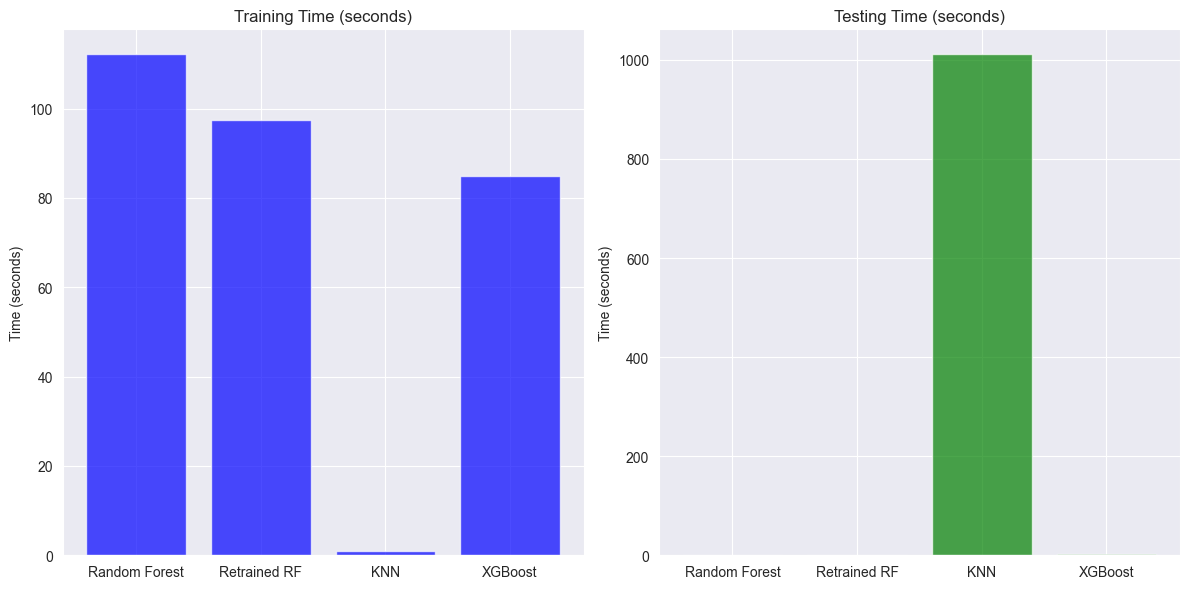

In [48]:
import matplotlib.pyplot as plt

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot training time
axes[0].bar(models, train_times, color='b', alpha=0.7)
axes[0].set_title('Training Time (seconds)')
axes[0].set_ylabel('Time (seconds)')

# Plot testing time
axes[1].bar(models, test_times, color='g', alpha=0.7)
axes[1].set_title('Testing Time (seconds)')
axes[1].set_ylabel('Time (seconds)')

# # Plot F1 scores
# axes[2].bar(models, f1_scores, color='r', alpha=0.7)
# axes[2].set_title('F1 Score')
# axes[2].set_ylabel('F1 Score')

# Show the plot
plt.tight_layout()
plt.savefig('train_test.png', dpi=600)
plt.show()